##### Q1 write at least two questions related to bike share project which cold be answered by data

## step 1 Data collection

In [1]:
# import all packages and functions
import numpy as np 
import pandas as pd

In [2]:
data1=pd.read_csv(r'C:\Users\AMIT\Desktop\MSIT_ML_CLASS-master\MSIT_ML_CLASS-master\bike-share-project\data\NYC-CitiBike-2016.csv')
data2=pd.read_csv(r'C:\Users\AMIT\Desktop\MSIT_ML_CLASS-master\MSIT_ML_CLASS-master\bike-share-project\data\Chicago-Divvy-2016.csv')
data3=pd.read_csv(r'C:\Users\AMIT\Desktop\MSIT_ML_CLASS-master\MSIT_ML_CLASS-master\bike-share-project\data\Washington-CapitalBikeshare-2016.csv')

filepath=r'C:\Users\AMIT\Desktop\MSIT_ML_CLASS-master\MSIT_ML_CLASS-master\bike-share-project\data\NYC-CitiBike-2016.csv'

city_name=filepath.split('\\')[-1].split('-')[0]
city_name

'NYC'

In [3]:
data1.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,839,1/1/2016 00:09:55,1/1/2016 00:23:54,532,S 5 Pl & S 4 St,40.710451,-73.960876,401,Allen St & Rivington St,40.720196,-73.989978,17109,Customer,NaN,0


In [4]:
data2.head(1)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,9080545,3/31/2016 23:30,3/31/2016 23:46,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990.0


In [5]:
data3.head(1)

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type
0,427387,3/31/2016 22:57,3/31/2016 23:04,31602,Park Rd & Holmead Pl NW,31207,Georgia Ave and Fairmont St NW,W20842,Registered


# step2: condensing the data

##### now we want only five columns month,hour ,day of week and duration in mins

In [6]:
data1['duration_in_mins']=data1['tripduration']/60
data1.head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,duration_in_mins
0,839,1/1/2016 00:09:55,1/1/2016 00:23:54,532,S 5 Pl & S 4 St,40.710451,-73.960876,401,Allen St & Rivington St,40.720196,-73.989978,17109,Customer,NaN,0,13.983333


In [7]:
data2['durations_in_mins']=data2['tripduration']/60
data2.head(1)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,durations_in_mins
0,9080545,3/31/2016 23:30,3/31/2016 23:46,2295,926,156,Clark St & Wellington Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1990.0,15.433333


In [8]:
data3['durations_in_mins']=data3['Duration (ms)']/60000


In [9]:
from datetime import datetime


In [10]:
data1['starttime']=pd.to_datetime(data1['starttime'])
data1['month']=data1['starttime'].apply(lambda x: x.strftime('%m'))


data2['starttime']=pd.to_datetime(data2['starttime'])
data2['month']=data2['starttime'].apply(lambda x: x.strftime('%m'))

data3['Start date']=pd.to_datetime(data3['Start date'])
data3['month']=data3['Start date'].apply(lambda x: x.strftime('%m'))

In [11]:
data1['hour']=data1['starttime'].apply(lambda x: x.strftime('%H'))

data2['hour']=data2['starttime'].apply(lambda x: x.strftime('%H'))

data3['hour']=data3['Start date'].apply(lambda x: x.strftime('%H'))

In [12]:
data1['day of week']=data1['starttime'].apply(lambda x: x.strftime('%A'))

data2['day of week']=data2['starttime'].apply(lambda x: x.strftime('%A'))

data3['day of week']=data3['Start date'].apply(lambda x: x.strftime('%A'))



In [13]:
data1.head(1)
print(data1['usertype'].unique())
print(data2['usertype'].unique())
print(data3['Member Type'].unique())

['Customer' 'Subscriber' nan]
['Subscriber' 'Customer']
['Registered' 'Casual']


In [14]:
for e in  data3['Member Type']:
    if e=="Registered":
        data3['usertype']="Subscriber"
    elif e=="Casual":
        data3['usertype']="Customer"
        
        

In [15]:
data3

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,durations_in_mins,month,hour,day of week,usertype
0,427387,2016-03-31 22:57:00,3/31/2016 23:04,31602,Park Rd & Holmead Pl NW,31207,Georgia Ave and Fairmont St NW,W20842,Registered,7.123117,03,22,Thursday,Subscriber
1,587551,2016-03-31 22:46:00,3/31/2016 22:56,31105,14th & Harvard St NW,31266,11th & M St NW,W21385,Registered,9.792517,03,22,Thursday,Subscriber
2,397979,2016-03-31 22:46:00,3/31/2016 22:53,31634,3rd & Tingey St SE,31108,4th & M St SW,W00773,Registered,6.632983,03,22,Thursday,Subscriber
3,444282,2016-03-31 22:42:00,3/31/2016 22:50,31200,Massachusetts Ave & Dupont Circle NW,31201,15th & P St NW,W21397,Registered,7.404700,03,22,Thursday,Subscriber
4,780875,2016-03-31 22:21:00,3/31/2016 22:34,31203,14th & Rhode Island Ave NW,31604,3rd & H St NW,W00213,Registered,13.014583,03,22,Thursday,Subscriber
5,1023312,2016-03-31 22:20:00,3/31/2016 22:37,31224,19th & L St NW,31623,Columbus Circle / Union Station,W01261,Registered,17.055200,03,22,Thursday,Subscriber
6,660699,2016-03-31 22:10:00,3/31/2016 22:21,31202,14th & R St NW,31200,Massachusetts Ave & Dupont Circle NW,W21341,Registered,11.011650,03,22,Thursday,Subscriber
7,1800705,2016-03-31 21:50:00,3/31/2016 22:20,31232,7th & F St NW / National Portrait Gallery,31273,Hains Point/Buckeye & Ohio Dr SW,W01049,Registered,30.011750,03,21,Thursday,Subscriber
8,217609,2016-03-31 21:45:00,3/31/2016 21:48,31265,5th St & Massachusetts Ave NW,31624,North Capitol St & F St NW,W20073,Registered,3.626817,03,21,Thursday,Subscriber
9,395528,2016-03-31 21:26:00,3/31/2016 21:33,31032,Washington Blvd & 7th St N,31035,N Quincy St & Glebe Rd,W00408,Registered,6.592133,03,21,Thursday,Subscriber


# Step3: now create new files containing file columns

In [16]:
new_data3=data3[['durations_in_mins','month','hour','day of week','usertype']]

In [17]:
new_data3

,durations_in_mins,month,hour,day of week,usertype
0,7.123117,03,22,Thursday,Subscriber
1,9.792517,03,22,Thursday,Subscriber
2,6.632983,03,22,Thursday,Subscriber
3,7.404700,03,22,Thursday,Subscriber
4,13.014583,03,22,Thursday,Subscriber
5,17.055200,03,22,Thursday,Subscriber
6,11.011650,03,22,Thursday,Subscriber
7,30.011750,03,21,Thursday,Subscriber
8,3.626817,03,21,Thursday,Subscriber
9,6.592133,03,21,Thursday,Subscriber


In [18]:
new_data2=data2[['durations_in_mins','month','hour','day of week','usertype']]
new_data2

,durations_in_mins,month,hour,day of week,usertype
0,15.433333,03,23,Thursday,Subscriber
1,3.300000,03,22,Thursday,Subscriber
2,2.066667,03,22,Thursday,Subscriber
3,19.683333,03,22,Thursday,Subscriber
4,10.933333,03,22,Thursday,Subscriber
5,19.000000,03,21,Thursday,Subscriber
6,6.966667,03,21,Thursday,Subscriber
7,17.033333,03,20,Thursday,Subscriber
8,6.116667,03,20,Thursday,Subscriber
9,6.316667,03,20,Thursday,Subscriber


In [19]:
new_data1=data1[['duration_in_mins','month','hour','day of week','usertype']]
new_data1

,duration_in_mins,month,hour,day of week,usertype
0,13.983333,01,00,Friday,Customer
1,11.433333,01,00,Friday,Subscriber
2,5.250000,01,00,Friday,Subscriber
3,12.316667,01,00,Friday,Subscriber
4,20.883333,01,00,Friday,Customer
5,8.750000,01,00,Friday,Subscriber
6,10.983333,01,00,Friday,Subscriber
7,7.733333,01,01,Friday,Subscriber
8,3.433333,01,01,Friday,Subscriber
9,7.083333,01,01,Friday,Customer


In [20]:
new_data1.to_csv('NYC Summary')

In [21]:
new_data2.to_csv("Chicago Summary")
new_data3.to_csv('Washington Summary')

# Step : exploratory data analytics

In [22]:
# which city has highest number of trips=NYC
# which city has highest proportion of trips made by subscriber=Washington
# which city has hihest proportion of trips made by short term customers=Chicago

n_usertype1=new_data1.groupby('usertype').usertype.count()
print(n_usertype1)
n_total1=n_usertype1['Customer']+n_usertype1['Subscriber']
print(n_total1)

n_usertype2=new_data2.groupby('usertype').usertype.count()
print(n_usertype2)
n_total2=n_usertype2['Customer']+n_usertype2['Subscriber']
print(n_total2)

n_usertype3=new_data3.groupby('usertype').usertype.count()
print(n_usertype3)
n_total3=n_usertype3['Subscriber']
print(n_total3)

print('proportion of trip made by subscibers in NYC',n_usertype1['Subscriber']/n_total1)
print('proportion of trip made by subscribers in Chicago',n_usertype2['Subscriber']/n_total2)
print('proportion of trip made by subscribers in Washington',n_usertype3['Subscriber']/n_total3)

print('proportion of trip made by short term customers ',n_usertype1['Customer']/n_total1)
print('proportion of trip made by short term customers ',n_usertype2['Customer']/n_total2)
print('proportion of trip made by short term customers 0.0')






usertype
Customer       30185
Subscriber    245896
Name: usertype, dtype: int64
276081
usertype
Customer      17149
Subscriber    54982
Name: usertype, dtype: int64
72131
usertype
Subscriber    66326
Name: usertype, dtype: int64
66326
proportion of trip made by subscibers in NYC 0.8906661450806104
proportion of trip made by subscribers in Chicago 0.7622520136973008
proportion of trip made by subscribers in Washington 1.0
proportion of trip made by short term customers  0.1093338549193896
proportion of trip made by short term customers  0.23774798630269925
proportion of trip made by short term customers 0.0


In [23]:
# what is the average trip length of each city 
# what is proportion of rides made in each city are longer than 30 minutes
total_mins1=0
for e in new_data1['duration_in_mins']:
    total_mins1+=e
print('average trip length of NYC is ',total_mins1/n_total1)

total_mins2=0
for e in new_data2['durations_in_mins']:
    total_mins2+=e
print('average trip length of Chicago is ',total_mins2/n_total2)

total_mins3=0
for e in new_data3['durations_in_mins']:
    total_mins3+=e
print('average trip length of Washington is ',total_mins3/n_total3)

n_usertype1_30=new_data1['duration_in_mins']>30
print('proportion of rides longer than 30 minutes in NYC',n_usertype1_30.sum()/n_total1)

n_usertype2_30=new_data2['durations_in_mins']>30
print('proportion of rides longer than 30 minutes in Chicago',n_usertype2_30.sum()/n_total2)

n_usertype3_30=new_data3['durations_in_mins']>30
print('proportion of rides longer than 30 minutes in Washington',n_usertype3_30.sum()/n_total3)

    

average trip length of NYC is  15.853659312545064
average trip length of Chicago is  16.563629368787335
average trip length of Washington is  18.93287355913721
proportion of rides longer than 30 minutes in NYC 0.07321402052296247
proportion of rides longer than 30 minutes in Chicago 0.08332062497400562
proportion of rides longer than 30 minutes in Washington 0.10838886711093688


In [24]:
print(new_data1.groupby('usertype')['duration_in_mins'].sum())
print('average time of customers in NYC',9.955618e+05/n_usertype1['Customer'])
print('average time of subscribers in NYC',3.364052e+06/n_usertype1['Subscriber'])


usertype
Customer      9.955618e+05
Subscriber    3.364052e+06
Name: duration_in_mins, dtype: float64
average time of customers in NYC 32.98200430677489
average time of subscribers in NYC 13.68079187949377


# step : Visualizations 

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

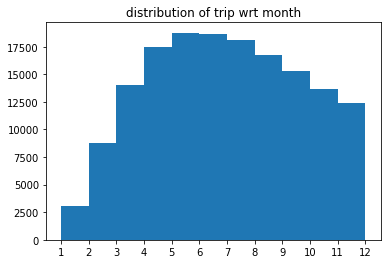

In [26]:
plt.hist(new_data1['duration_in_mins'].values,bins=range(1,13))
plt.title('distribution of trip wrt month')
plt.xticks(range(1,13))
plt.show()




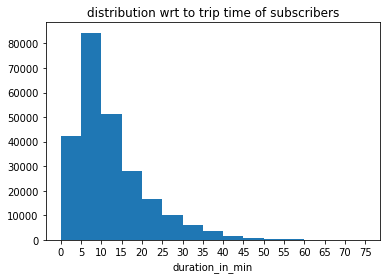

In [40]:
a=[]
b=[]
i=0
for e in new_data1['duration_in_mins']:
    if new_data1['usertype'][i]=='Subscriber':
        a.append(e)
        i+=1
    else:
        b.append(e)
        i+=1
    



plt.hist(a,bins=range(0,80,5))
plt.title('distribution wrt to trip time of subscribers')
plt.xlabel('duration_in_min')
plt.xticks(range(0,80,5))
plt.show()

In [37]:
new_data1['usertype'][0]

'Customer'

In [38]:
new_data1['usertype'].values

array(['Customer', 'Subscriber', 'Subscriber', ..., 'Subscriber',
       'Subscriber', 'Subscriber'], dtype=object)

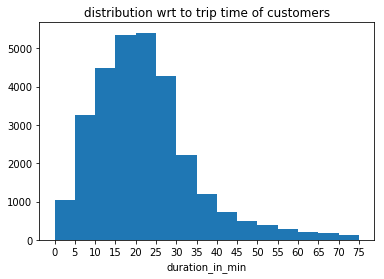

In [41]:
plt.hist(b,bins=range(0,80,5))
plt.title('distribution wrt to trip time of customers')
plt.xlabel('duration_in_min')
plt.xticks(range(0,80,5))
plt.show()

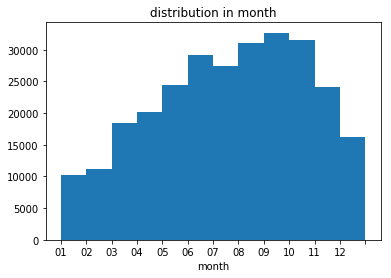

In [34]:
plt.hist([new_data1['month'].values],bins=range(0,13))
plt.title('distribution in month')
plt.xlabel('month')
plt.xticks(range(0,13))
plt.show()


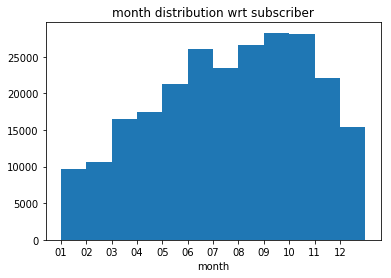

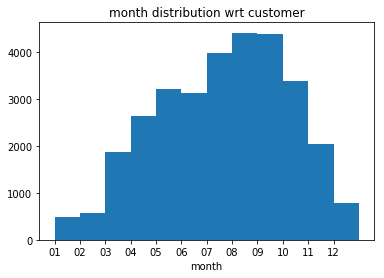

In [32]:
a=[]
b=[]
i=0
for e in new_data1['month'].values:
    if new_data1['usertype'][i]=="Subscriber":
        a.append(e)
        i+=1
    else:
        b.append(e)
        i+=1
plt.hist(a,bins=range(0,13))
plt.title('month distribution wrt subscriber')
plt.xlabel('month')
plt.show()

plt.hist(b,bins=range(0,13))
plt.title('month distribution wrt customer')
plt.xlabel('month')
plt.show()